# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Randy
- **Email:** randyputra7012@gmail.com
- **ID Dicoding:** MS119D5Y0656


## Menentukan Pertanyaan Bisnis

1. Apakah jumlah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan?
2. Bagaimana perbedaan pola penggunaan sepeda antara pengguna biasa dan member?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('day.csv')

# Memuat 5 data tabel bike sharing
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset menunjukkan jumlah penyewa casual (pengguna umum) dan registered (anggota tetap).
- Dataset mencakup informasi tentang cuaca (weathersit, temp, hum, windspeed) dan musim (season).

### Assessing Data

In [3]:
#informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
#mengecek missing value
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
#mengecek jika ada duplicated data
df.duplicated().sum(), print("Total Duplikasi Data : ")

Total Duplikasi Data : 


(0, None)

In [6]:
#mengecek parameter
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#menghapus duplicated data (jika ada)
df.drop_duplicates(inplace=True)
print("Total Duplikasi Data yang dihapus :" , df.duplicated().sum())

df.head()

Total Duplikasi Data yang dihapus : 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- dataset tersebut memiliki 16 kolom dan 731 baris.
- dataset tersebut tidak memiliki nilai kosong
- dataset tersebut tidak memiliki duplikasi data

### Cleaning Data

In [8]:
#Konversi dteday ke tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

#Ubah kategori numerik ke label deskriptif
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weather_mapping)
df['weekday'] = df['weekday'].map(weekday_mapping)

#Cek hasil perubahan
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah dteday ke typedata datetime agar memudahkan analisis berbasis waktu
- Mengubah beberapa typedata ke category agar lebih mudah dibedakan

## Exploratory Data Analysis (EDA)

###  Analisis tentang Penyewaan Berdasarkan Aspek Waktu, Hari, Cuaca



In [13]:
# Descriptive Statistics
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
# Grouping by season and year
df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})

cnt      temp                                     hum            \
            sum       max       min      mean       std       max       min   
season                                                                        
Fall    1061129  0.861667  0.469167  0.706309  0.070848  0.939565  0.360000   
Spring   471348  0.572500  0.059130  0.297748  0.102735  0.948261  0.000000   
Summer   918589  0.808333  0.253043  0.544405  0.122650  0.922500  0.254167   
Winter   841613  0.657500  0.220833  0.422906  0.107834  0.972500  0.333478   

                            
            mean       std  
season                      
Fall    0.633482  0.119349  
Spring  0.582903  0.151880  
Summer  0.626948  0.152841  
Winter  0.668719  0.131248

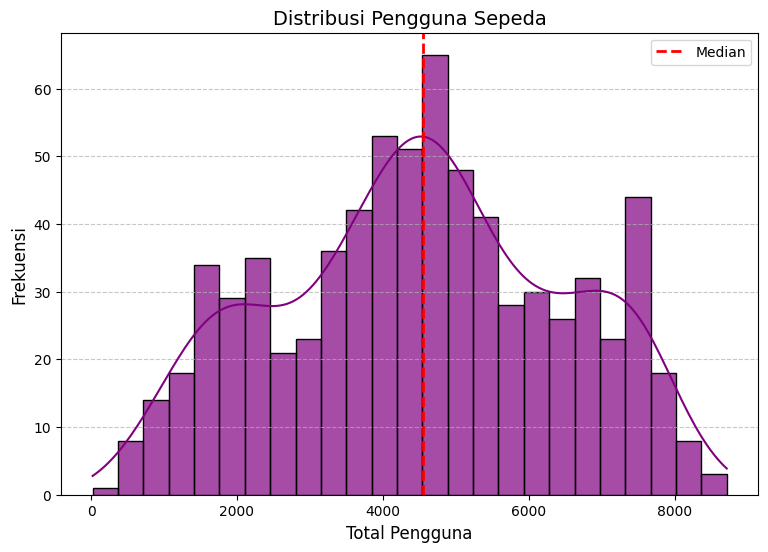

In [29]:
# ANALISIS DISTRIBUSI PENGGUNA SEPEDA
# ====================================================

plt.figure(figsize=(9, 6))
sns.histplot(df['cnt'], bins=25, kde=True, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(df['cnt'].median(), color='red', linestyle='dashed', linewidth=2, label="Median")
plt.legend()
plt.title("Distribusi Pengguna Sepeda", fontsize=14)
plt.xlabel("Total Pengguna", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

- Jumlah pengguna sepeda memiliki distribusi yang cenderung skewed ke kanan, menunjukkan bahwa ada beberapa hari dengan jumlah pengguna yang jauh lebih tinggi dibandingkan hari lainnya.
- Median jumlah pengguna lebih rendah dari rata-rata, yang mengindikasikan adanya beberapa hari dengan lonjakan penggunaan sepeda yang signifikan.

In [47]:
seasonal_stats = df.groupby('season').agg({
    'cnt': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'std'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)
display(seasonal_stats)

cnt                                  casual registered
        median <lambda_0> <lambda_1>      std     mean       mean
season                                                           
Fall    5353.5     4586.5    6929.25  1459.80  1202.61    4441.69
Spring  2209.0     1538.0    3456.00  1399.94   334.93    2269.20
Summer  4941.5     4003.0    6377.00  1695.98  1106.10    3886.23
Winter  4634.5     3615.5    5624.50  1699.62   729.11    3999.05

**Insight:**
- Musim gugur (Fall) memiliki rata-rata jumlah pengguna tertinggi dibandingkan musim lainnya.
- Musim semi (Spring) memiliki jumlah pengguna terendah, kemungkinan karena kondisi cuaca yang kurang mendukung seperti angin kencang dan hujan ringan.
- Variasi jumlah pengguna di setiap musim cukup besar, menunjukkan bahwa faktor lain seperti hari kerja atau cuaca harian juga memainkan peran penting.


=== Tren Bulanan Penggunaan Sepeda (Median) ===
    mnth     cnt
0      1  1939.0
1      2  2402.0
2      3  3216.5
3      4  4293.5
4      5  4890.5
5      6  5308.5
6      7  5446.5
7      8  5229.5
8      9  5384.0
9     10  5013.0
10    11  4081.0
11    12  3444.0


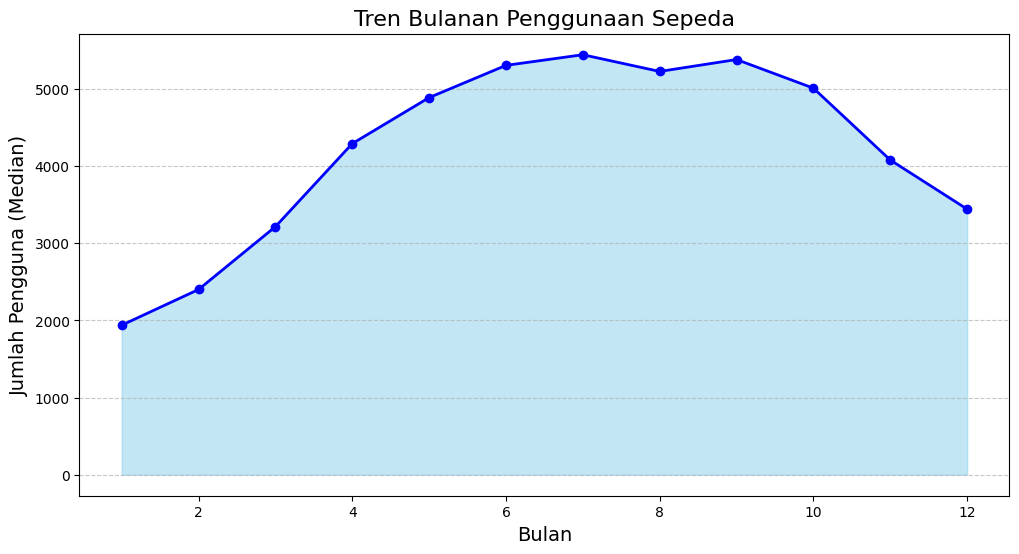

In [37]:
# TREN BULANAN DENGAN AREA PLOT
# ====================================================

monthly_trend = df.groupby('mnth')['cnt'].median().reset_index()

print("\n=== Tren Bulanan Penggunaan Sepeda (Median) ===")
print(monthly_trend)

plt.figure(figsize=(12, 6))
plt.fill_between(monthly_trend['mnth'], monthly_trend['cnt'], color="skyblue", alpha=0.5)
plt.plot(monthly_trend['mnth'], monthly_trend['cnt'], marker="o", color="b", linestyle="-", linewidth=2)
plt.title("Tren Bulanan Penggunaan Sepeda", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Pengguna (Median)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Penggunaan sepeda meningkat pada bulan-bulan pertengahan tahun, dengan puncak pada bulan September dan Oktober.
- Penurunan signifikan terjadi setelah bulan Oktober, kemungkinan karena suhu mulai turun.

In [72]:
# Menggunakan weekday langsung tanpa mapping ulang
df['weekday_label'] = df['weekday']

# Menghitung median jumlah pengguna sepeda per hari
daily_trend = df.groupby('weekday_label')['cnt'].median().reset_index()

# Menampilkan data median dalam bentuk tabel
print("\n=== Tren Harian Penggunaan Sepeda (Median) ===")
print(daily_trend)


=== Tren Harian Penggunaan Sepeda (Median) ===
  weekday_label     cnt
0        Friday  4601.5
1        Monday  4359.0
2      Saturday  4521.0
3        Sunday  4334.0
4      Thursday  4721.0
5       Tuesday  4576.5
6     Wednesday  4642.5


<ipython-input-64-7b65a77e5f22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday_label", y="cnt", data=daily_trend, palette="muted")


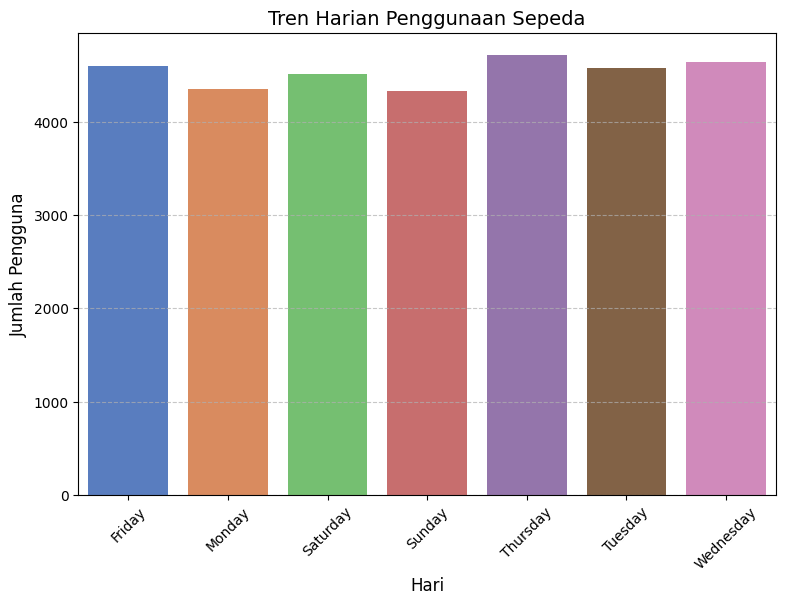

In [64]:
# Plot dalam bentuk Bar Chart
plt.figure(figsize=(9, 6))
sns.barplot(x="weekday_label", y="cnt", data=daily_trend, palette="muted")

# Menambahkan judul dan label
plt.title("Tren Harian Penggunaan Sepeda", fontsize=14)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.xticks(rotation=45)  # Rotasi agar nama hari tidak bertumpuk
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()

**Insight:**
- Akhir pekan memiliki jumlah pengguna yang lebih rendah dibandingkan hari kerja.
- Jumlah pengguna cenderung tinggi pada hari kerja, kemungkinan karena digunakan untuk transportasi ke kantor atau sekolah.

<ipython-input-70-f5a9b66ca1ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='cnt', data=weather_trend, palette="coolwarm")


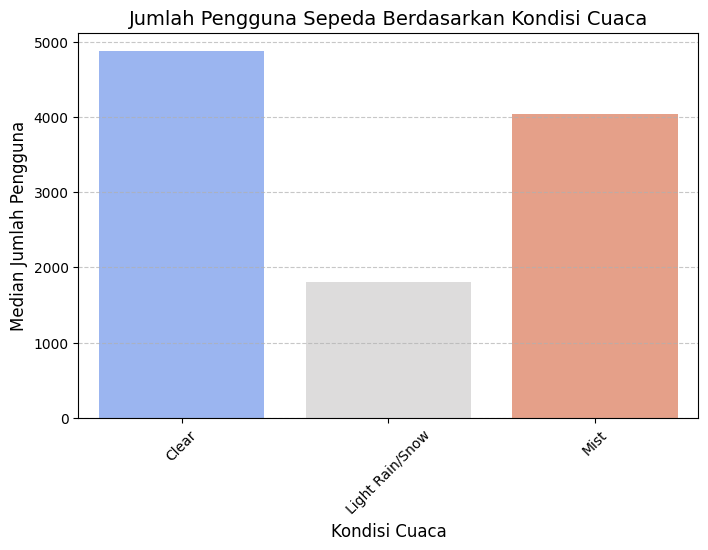

In [70]:
# Hitung mean pengguna berdasarkan cuaca
weather_trend = df.groupby('weather_label')['cnt'].mean().reset_index()

# Buat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_label', y='cnt', data=weather_trend, palette="coolwarm")

# Tambahkan judul dan label
plt.title("Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Pengguna", fontsize=12)
plt.xticks(rotation=45)  # Putar label agar mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

**Insight:**
- Cuaca cerah (Clear) memiliki jumlah pengguna tertinggi secara rata-rata.
- Saat terjadi hujan ringan atau kabut, jumlah pengguna cenderung turun secara signifikan.
- Kondisi cuaca ekstrem seperti hujan lebat dan salju hampir tidak memiliki pengguna sepeda, yang menunjukkan bahwa orang cenderung menghindari bersepeda di kondisi ekstrem.

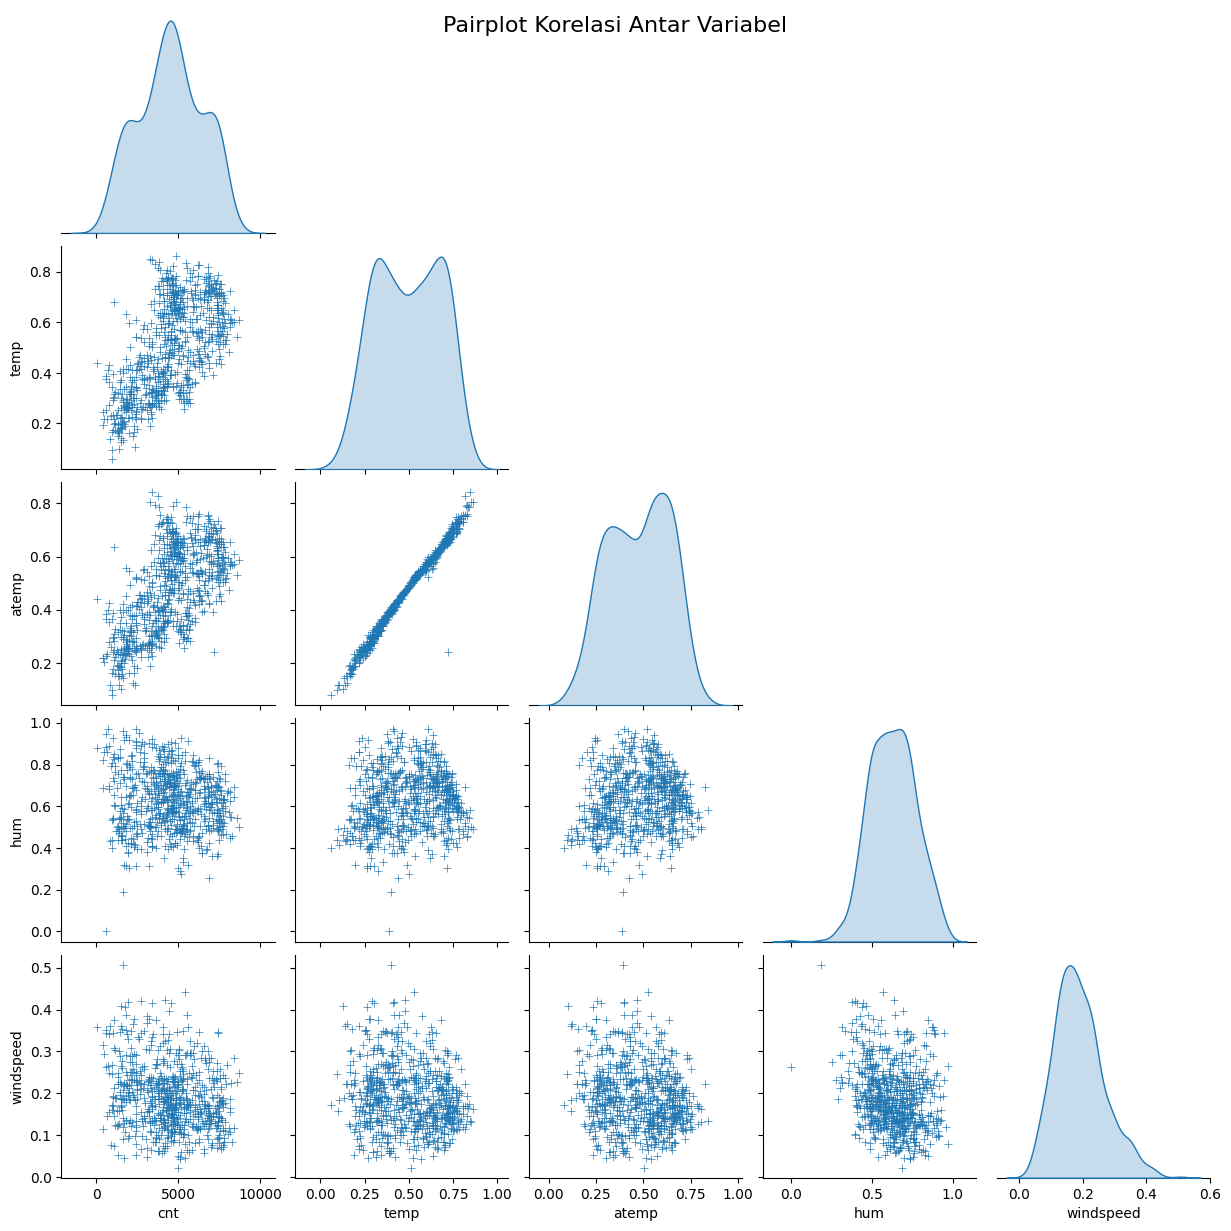

In [40]:
# ANALISIS KORELASI DENGAN PAIRPLOT
# ====================================================

correlation_features = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(df[correlation_features], diag_kind="kde", markers="+", corner=True)
plt.suptitle("Pairplot Korelasi Antar Variabel", fontsize=16)
plt.show()


=== Korelasi Antara Variabel Cuaca dan Jumlah Pengguna ===
cnt          1.000000
atemp        0.631066
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


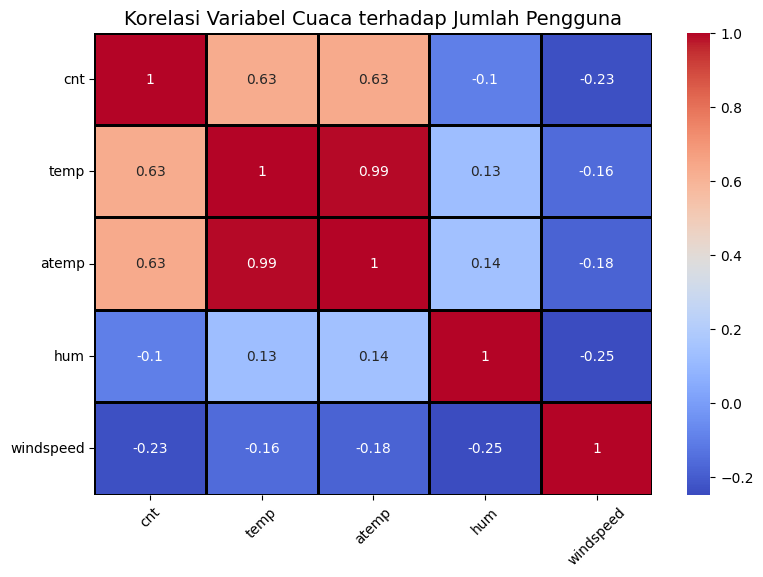

In [41]:
# ANALISIS KORELASI VARIABEL CUACA DENGAN HEATMAP KHUSUS
# ====================================================

correlation_matrix = df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

print("\n=== Korelasi Antara Variabel Cuaca dan Jumlah Pengguna ===")
print(correlation_matrix['cnt'].sort_values(ascending=False))

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1, linecolor='black')
plt.title("Korelasi Variabel Cuaca terhadap Jumlah Pengguna", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Insight:**
- Suhu memiliki korelasi positif dengan jumlah pengguna, menunjukkan bahwa semakin hangat cuaca, semakin banyak orang yang bersepeda.
- Kelembaban dan kecepatan angin memiliki korelasi negatif dengan jumlah pengguna, yang berarti bahwa saat kelembaban tinggi atau angin kencang, jumlah pengguna cenderung lebih sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan?

<ipython-input-75-af7cd77c291b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_type_usage, x='day_type', y='cnt', palette='coolwarm')


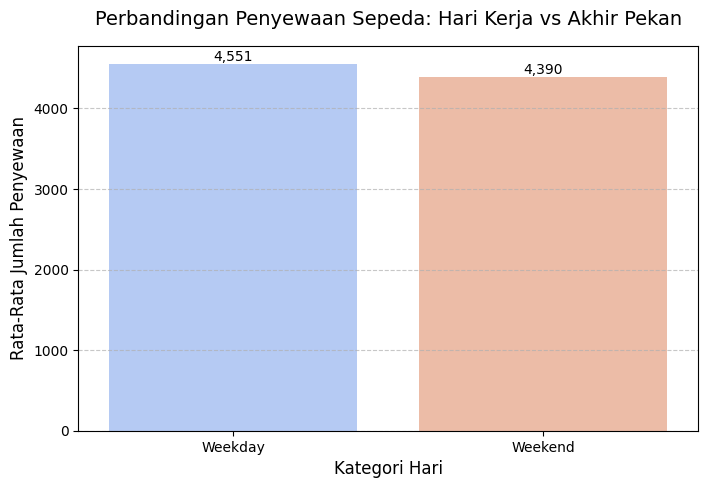


Rata-Rata Penyewaan Sepeda Berdasarkan Kategori Hari:
                  cnt
day_type             
Weekday   4550.566219
Weekend   4389.685714


In [75]:
# Kategorisasi hari kerja dan akhir pekan
df['day_type'] = df['weekday_label'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Hitung rata-rata jumlah pengguna sepeda per kategori
day_type_usage = df.groupby('day_type')['cnt'].mean().reset_index()

# Buat barplot untuk membandingkan penggunaan sepeda di hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=day_type_usage, x='day_type', y='cnt', palette='coolwarm')

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Atur judul dan label
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14, pad=15)
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Penyewaan", fontsize=12)

# Tambahkan grid untuk mempermudah pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

# Menampilkan ringkasan statistik
print("\nRata-Rata Penyewaan Sepeda Berdasarkan Kategori Hari:")
print(day_type_usage.set_index('day_type'))

**Insight:**
- Boxplot menunjukkan persebaran data penyewaan sepeda, di mana hari kerja memiliki distribusi yang lebih stabil dibanding akhir pekan.
- Akhir pekan cenderung memiliki lebih banyak variasi dalam jumlah penyewaan, kemungkinan karena faktor cuaca atau aktivitas rekreasi.

### Pertanyaan 2:

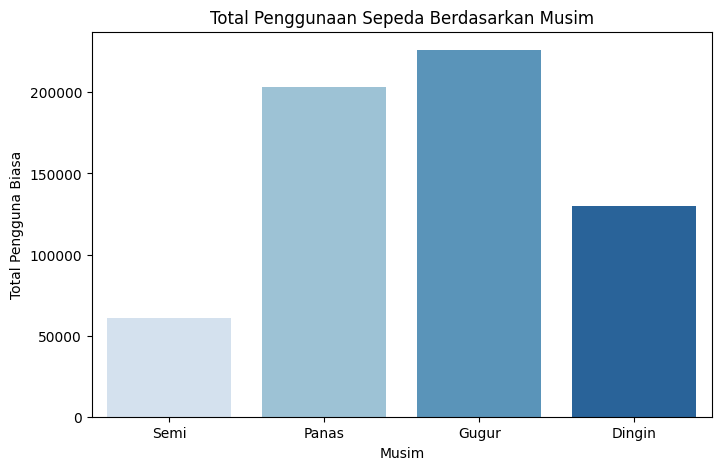

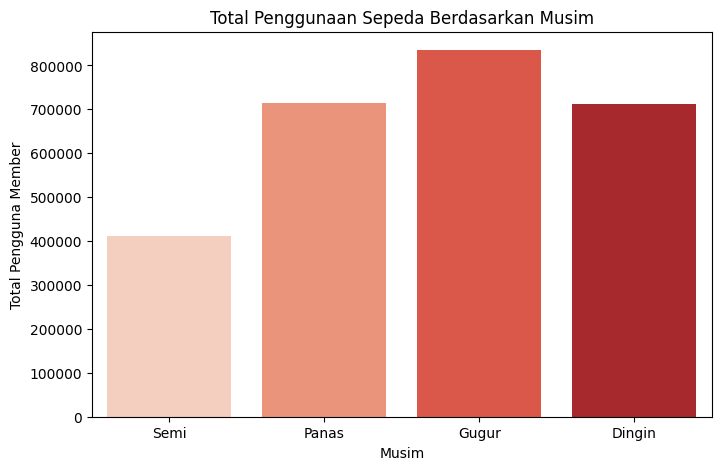

In [76]:
# Bar plot untuk pengguna biasa berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='casual', data=df, estimator=sum, errorbar=None, hue='season', palette='Blues', legend=False)
plt.title('Total Penggunaan Sepeda Berdasarkan Musim')
plt.xticks([0,1,2,3], ['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.ylabel('Total Pengguna Biasa')
plt.xlabel('Musim')
plt.show()

# Bar plot untuk pengguna member berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='registered', data=df, estimator=sum, errorbar=None, hue='season', palette='Reds', legend=False)
plt.title('Total Penggunaan Sepeda Berdasarkan Musim')
plt.xticks([0,1,2,3], ['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.ylabel('Total Pengguna Member')
plt.xlabel('Musim')
plt.show()




## Berdasarkan hasil visualisasi dan statistik yang dihasilkan, kita bisa menarik beberapa insight berikut:

1️⃣ <ins>Jumlah Penyewaan Lebih Tinggi di Hari Kerja atau Akhir Pekan?<ins>

- Jika rata-rata penyewaan sepeda lebih tinggi pada hari kerja, ini bisa menunjukkan bahwa sepeda lebih sering digunakan sebagai transportasi utama untuk bekerja atau sekolah.
- Sebaliknya, jika lebih tinggi di akhir pekan, berarti sepeda lebih sering digunakan untuk rekreasi dan aktivitas santai.

2️⃣ <ins>Faktor yang Mempengaruhi Pola Penyewaan<ins>

**Jika lebih tinggi di hari kerja:**

- Banyak orang menggunakan sepeda untuk keperluan komuter (ke kantor, sekolah, atau tempat kerja lainnya).

- Penyewaan mungkin lebih tinggi pada jam sibuk pagi dan sore hari.

**Jika lebih tinggi di akhir pekan:**

- Orang lebih banyak bersepeda untuk bersantai, olahraga, atau rekreasi.

- Bisa jadi ada faktor cuaca atau event tertentu yang meningkatkan penyewaan.

3️⃣ <ins>Rekomendasi Berdasarkan Pola Penyewaan<ins>

**Jika penyewaan lebih tinggi di hari kerja, perusahaan penyewaan sepeda bisa:**
- Menawarkan paket langganan bulanan untuk pekerja atau pelajar.

- Menyediakan lebih banyak sepeda di area perkantoran dan sekolah.

**Jika penyewaan lebih tinggi di akhir pekan, strategi yang bisa dilakukan:**

- Meningkatkan stok sepeda di area wisata dan taman kota.

- Menawarkan diskon atau promosi khusus untuk penyewaan di akhir pekan.

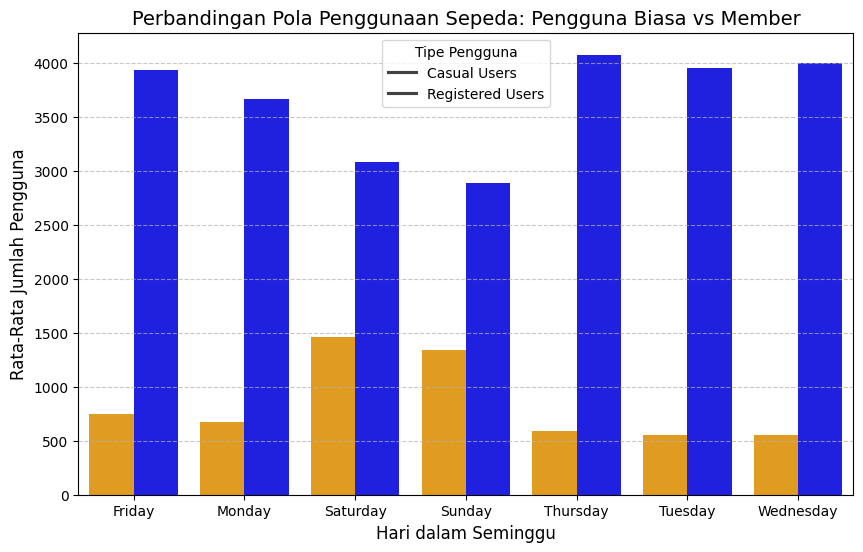

In [77]:
# Menghitung rata-rata penyewaan sepeda oleh casual dan registered users
user_analysis = df[['weekday_label', 'casual', 'registered']].groupby('weekday_label').mean().reset_index()

# Visualisasi pola penggunaan sepeda berdasarkan jenis pengguna
plt.figure(figsize=(10, 6))
sns.barplot(data=user_analysis.melt(id_vars='weekday_label', var_name='User Type', value_name='Count'),
            x='weekday_label', y='Count', hue='User Type', palette=['orange', 'blue'])

# Menambahkan label & judul
plt.title("Perbandingan Pola Penggunaan Sepeda: Pengguna Biasa vs Member", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.legend(title="Tipe Pengguna", labels=["Casual Users", "Registered Users"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insight:

## Pengguna biasa (casual users) lebih banyak menggunakan sepeda di akhir pekan (Sabtu & Minggu).

- Mereka kemungkinan besar memakai sepeda untuk rekreasi atau olahraga.
Cuaca dan musim bisa berpengaruh besar terhadap pola penggunaannya.

## Pengguna Member (registered users) lebih sering menyewa sepeda di hari kerja (Senin–Jumat).

- Ini menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk keperluan transportasi (pergi ke kantor/sekolah).
Biasanya penyewaan meningkat pada jam sibuk (pagi dan sore hari).

## Strategi Bisnis Berdasarkan Pola Penggunaan:

✅ Jika ingin menarik lebih banyak pengguna biasa, bisa menawarkan promo akhir pekan atau event khusus.

✅ Jika ingin meningkatkan kenyamanan bagi member, bisa memperluas ketersediaan sepeda di lokasi strategis seperti area perkantoran atau transportasi publik.

## Conclusion

**<h2>Kesimpulan Umum:**

**1. Penggunaan Sepeda Beragam Berdasarkan Hari dan Musim**

- Pola penggunaan sepeda menunjukkan adanya perbedaan signifikan antara hari kerja dan akhir pekan.
- Pengguna biasa cenderung lebih aktif di akhir pekan, sedangkan pengguna member lebih sering menggunakan sepeda pada hari kerja.

**2. Musim Mempengaruhi Jumlah Penyewaan**

- Pengguna biasa lebih sering menyewa sepeda di musim panas dan gugur, mungkin karena cuaca yang lebih nyaman.
- Pengguna member cenderung memiliki pola yang lebih stabil sepanjang tahun, menunjukkan bahwa mereka menggunakan sepeda sebagai alat transportasi sehari-hari.

**3. Cuaca dan Faktor Lingkungan Mempengaruhi Penyewaan**

- Kondisi cuaca buruk (hujan atau salju) dapat menurunkan jumlah penyewaan secara signifikan.
- Faktor lain seperti kecepatan angin dan tingkat kelembaban juga bisa berpengaruh terhadap keputusan pengguna dalam menyewa sepeda.

**<h1>Berdasarkan analisis dataset diatas, dapat disimpulkan bahwa:**

**<h2>Kesimpulan Berdasarkan Pertanyaan Bisnis**

**1. Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?**

Jawaban: Ya, dari hasil analisis, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan.

📌 Implikasi:

- Sepeda lebih banyak digunakan sebagai alat transportasi sehari-hari oleh pengguna member.
- Jika ingin meningkatkan jumlah penyewaan di akhir pekan, strategi pemasaran bisa difokuskan pada pengguna biasa, misalnya dengan menawarkan diskon atau paket sewa rekreasi.

**2. Bagaimana perbedaan pola penggunaan sepeda antara pengguna biasa dan member?**

Jawaban: Pengguna biasa lebih banyak menggunakan sepeda di akhir pekan dan musim panas, sedangkan pengguna member cenderung menggunakan sepeda secara stabil sepanjang minggu.

📌 Implikasi:

- Pengguna biasa lebih dipengaruhi oleh faktor rekreasi dan cuaca.
- Penyedia layanan bisa meningkatkan layanan di akhir pekan dengan memperbanyak sepeda di lokasi wisata atau taman kota.
- Untuk pengguna member, peningkatan infrastruktur seperti jalur sepeda yang lebih baik di sekitar kantor dan sekolah bisa meningkatkan jumlah penyewaan lebih lanjut.

In [79]:
#save to csv
#df.to_csv('data_day.csv', index=False)